d:\conda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\conda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\conda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 28201 (\N{CJK UNIFIED IDEOGRAPH-6E29}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\conda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\conda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas

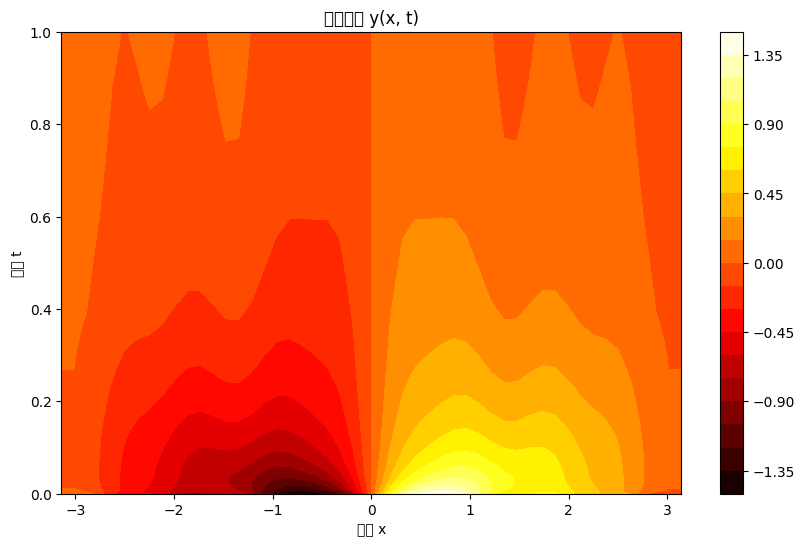

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
L = np.pi  # 空间区间长度
T = 1.0    # 时间区间长度
d = 1      # 扩散系数

nx = 50    # 空间节点数
nt = 1000  # 时间步数

dx = L / (nx - 1)
dt = T / nt

# 创建空间和时间网格
x = np.linspace(-L, L, nx)
t = np.linspace(0, T, nt)

# 初始条件
y0 = np.sin(x) + np.sin(2*x)/2 + np.sin(3*x)/3 + np.sin(4*x)/4 + np.sin(8*x)/8

# 初始温度分布
y = np.zeros((nt, nx))
y[0] = y0

# 显式有限差分法求解
for n in range(0, nt-1):
    for i in range(1, nx-1):
        y[n+1, i] = y[n, i] + dt * (
            d * (y[n, i+1] - 2*y[n, i] + y[n, i-1]) / dx**2 +
            np.exp(-t[n]) * (3*np.sin(2*x[i])/2 + 8*np.sin(3*x[i])/3 + 
                             15*np.sin(4*x[i])/4 + 63*np.sin(8*x[i])/8)
        )
    # 边界条件
    y[n+1, 0] = 0
    y[n+1, -1] = 0

# 可视化结果
X, T = np.meshgrid(x, t)
plt.figure(figsize=(10, 6))
plt.contourf(X, T, y, 20, cmap='hot')
plt.colorbar()
plt.xlabel('空间 x')
plt.ylabel('时间 t')
plt.title('温度分布 y(x, t)')
plt.show()
